# Task 2: Deep Learning with TensorFlow (MNIST Dataset)

**Goal:**
- Build a CNN model to classify handwritten digits
- Achieve >95% test accuracy
- Visualize the model’s predictions on 5 sample images

In [1]:
# 1. Import required libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 2. Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add channel dimension
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

11493376/11490434 [==============================] - 8s 1us/step


In [3]:
# 3. Build a CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [4]:
# 4. Train the model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1, batch_size=64)

Epoch 1/5
844/844 [==============================] - 51s 61ms/step - loss: 0.2012 - accuracy: 0.9378 - val_loss: 0.0648 - val_accuracy: 0.9822
Epoch 2/5
844/844 [==============================] - 55s 65ms/step - loss: 0.0576 - accuracy: 0.9824 - val_loss: 0.0486 - val_accuracy: 0.9873
Epoch 3/5
844/844 [==============================] - 46s 54ms/step - loss: 0.0423 - accuracy: 0.9871 - val_loss: 0.0409 - val_accuracy: 0.9885
Epoch 4/5
844/844 [==============================] - 46s 54ms/step - loss: 0.0312 - accuracy: 0.9900 - val_loss: 0.0409 - val_accuracy: 0.9885
Epoch 5/5
844/844 [==============================] - 48s 57ms/step - loss: 0.0239 - accuracy: 0.9923 - val_loss: 0.0422 - val_accuracy: 0.9900


In [5]:
# 5. Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 [==============================] - 2s 8ms/step - loss: 0.0326 - accuracy: 0.9891
Test Accuracy: 0.9891


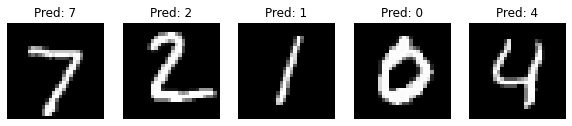

In [6]:
# 6. Visualize predictions on 5 sample test images
sample_images = x_test[:5]
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}")
    plt.axis('off')
plt.show()